---
# DELL LEAD - Curso de Visualização de Dados 📊

<b> Oficina - Aula 4.2 </b>

Neste notebook irei apresentar um pouco as ferramentas mais utilizadas para <b>visualização de distribuições conjuntas</b>. Utilizarei o data set "mpg" contido na biblioteca Seaborn. Ele é formado por informações sobre: consumo de galão de combustível por milha (miles per galon, mpg), número de cilindros, cilindrada, cavalos de potência, peso, aceleração, ano do modelo, país de origem e nome do carro.

Por: Pedro Florencio de Almeida Neto

---

<b>(Questão 1)</b> Importe as bibliotecas pandas, matplotlib e seaborn e use a palavra mágica inline para exibir as visualizações no notebook. Carregue os dados em um DataFrame. Os dados podem ser carregados pelo seaborn utilizando a função load_dataset(‘mpg’).

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [58]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


---
<b>(Questão 2)</b> Crie uma visualização que mostre a distribuição conjunta de todas as variáveis quantitativas, diferenciando pelo país de origem (‘origin’). Quais variáveis possuem uma maior correlação?

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pedro\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


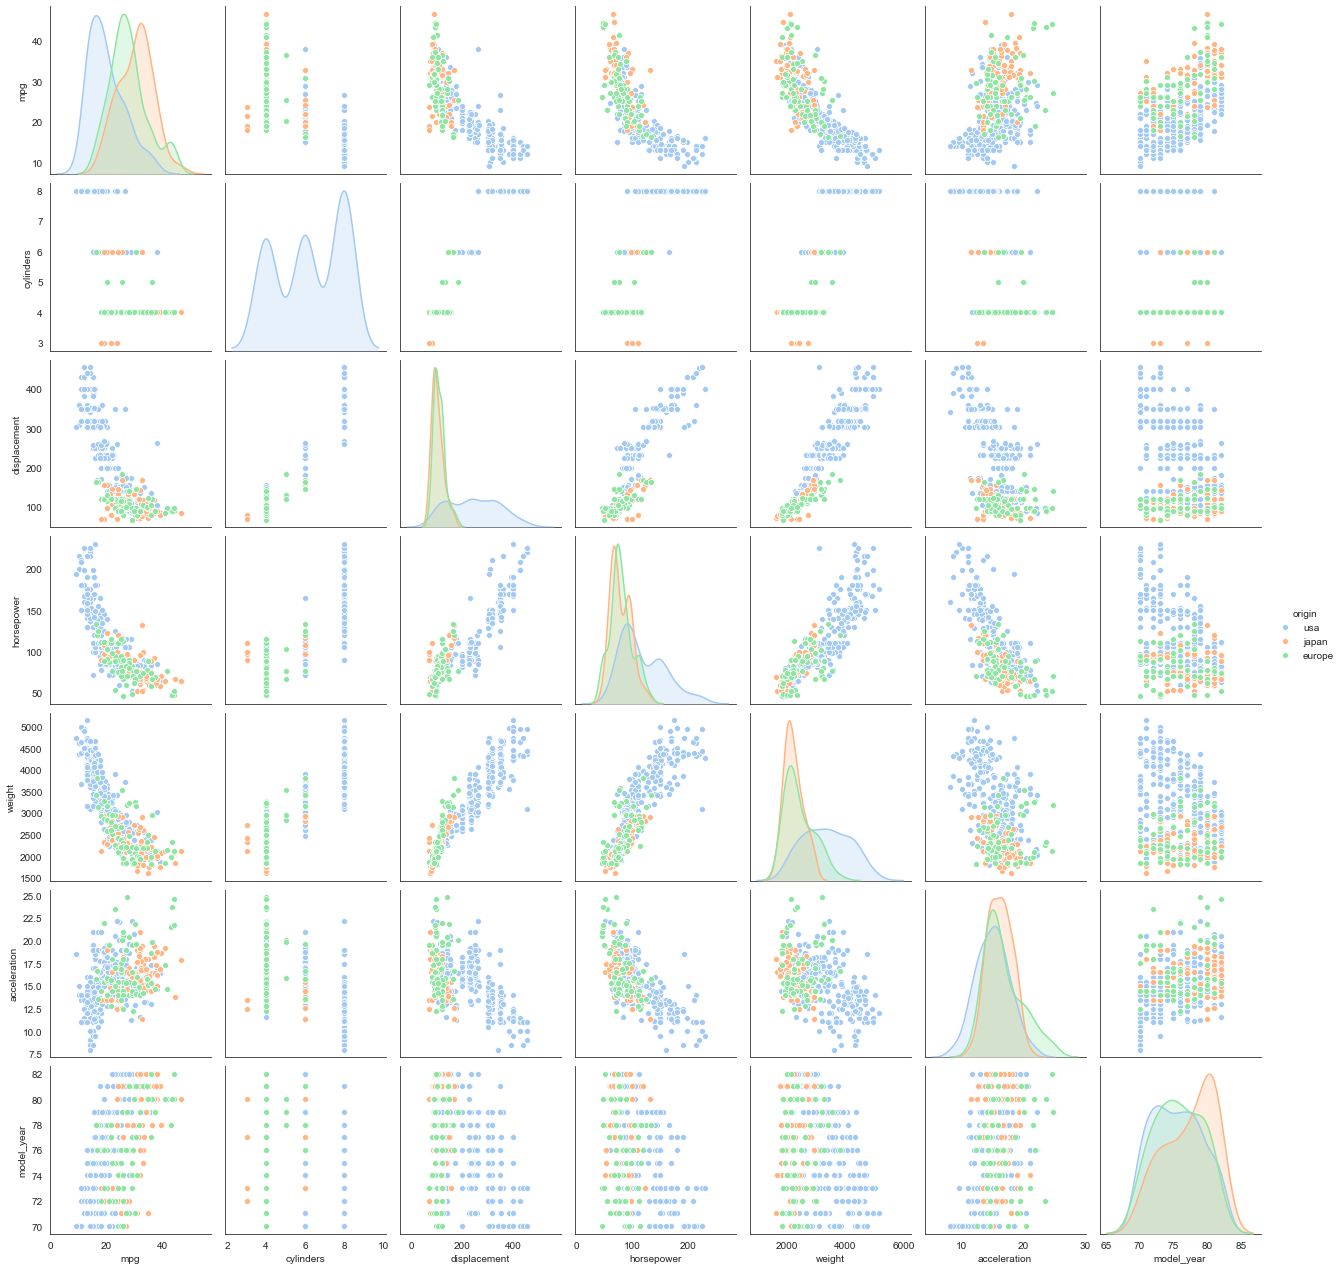

In [63]:
sns.set_style('white')
sns.pairplot(df,hue='origin',palette='pastel')
plt.show()

<b>Observações:</b>
* Há uma forte correlação positiva entre peso e cilindrada/potência. Isto é, conforme a potência de um carro aumenta, seu peso será maior. Isso pode ter relação com a construção dos motores desses veículos. Os mais econômicos possuem cilindros menores e em menor quantidade, o que acaba reduzindo sua massa e sua potência. Entretanto, devemos sempre ter cuidado com esse tipo de afirmação porque nem sempre <b>correlação</b> implica em <b>causalidade</b>.


---
<b>(Questão 3)</b> Sobre a visualização da questão 2, é possível distinguir o país de origem a partir da distribuição de uma variável? E de uma distribuição conjunta?

* A partir da distribuição conjunta de consumo e potência, nota-se que os carros de origem estadunidense têm uma maior eficiência, com maiores taxas de potência e baixo consumo.

* A partir do valor de distribuição de displacement (cilindradas) é possível notar que carros de origem estadunidense seguem uma distribuição relativamente uniforme, enquanto os de origem europeia e japonesa possuem valores em torno de um ponto específico muito semelhante para ambos. Podemos observar melhor através de um <b>gráfico de enxame</b>, por exemplo:


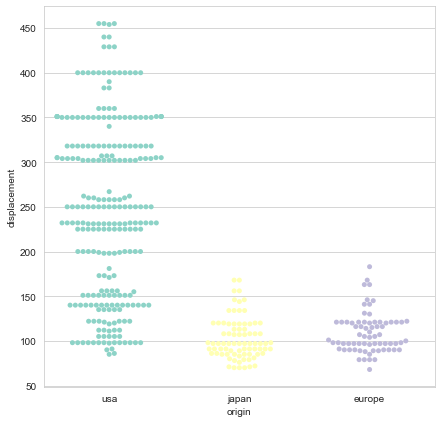

In [65]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.swarmplot(x='origin',y='displacement',data=df,palette='Set3')
plt.show()

<b>Observação:</b>
* É preciso tomar cuidado em afirmar que os carros de origem japonesa e europeia possuem valores poucos dispersos e semelhantes de cilindradas , por conta que <b>há muito mais carros estadunidenses</b> nesse dataset:

In [75]:
print('Quantidade de veículos (por origem)')
df.groupby(by='origin').count()['displacement']

Quantidade de veículos (por origem)


origin
europe     70
japan      79
usa       249
Name: displacement, dtype: int64

---
<b>(Questão 4)</b> Escolha uma distribuição conjunta em que as variáveis estejam fortemente correlacionadas e crie um gráfico que permita analisar a distribuição conjunta, a reta de regressão e as distribuições marginais.

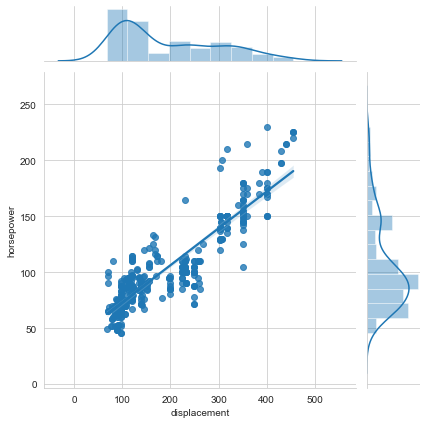

In [73]:
sns.jointplot(x='displacement',y='horsepower',data=df,kind='reg')
plt.show()

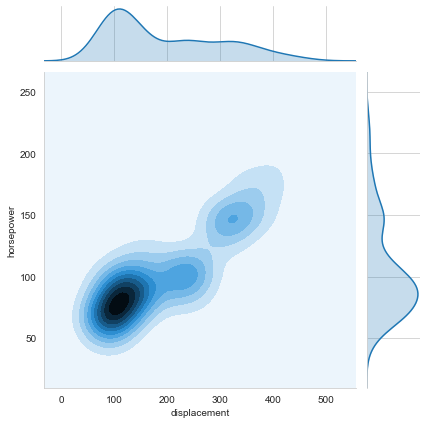

In [74]:
sns.jointplot(x='displacement',y='horsepower',data=df,kind='kde')
plt.show()

* No primeiro gráfico observamos a correlação entre cilindradas e potência (correlação positiva alta). É possível notar onde há maior probabilidade dos dados se distribuirem nessas duas variáveis através do segundo gráfico.

<b>Obrigado!</b>

---